In [5]:
#!/usr/bin/env python3
# -*- coding: UTF-8 -*-

"""
2019-05-27 + kolokwium
"""

import matplotlib.pyplot as plt
import numpy as np

cumulated fractions of variance in original data:
fraction and retained axes
0.9 4


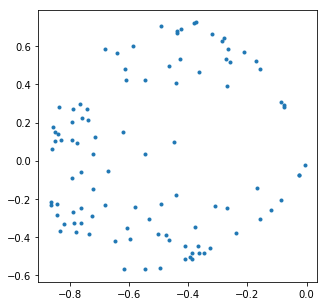

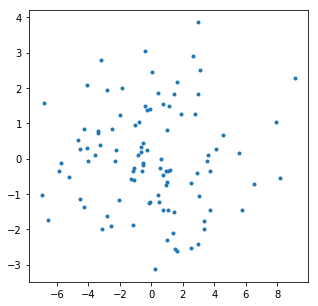

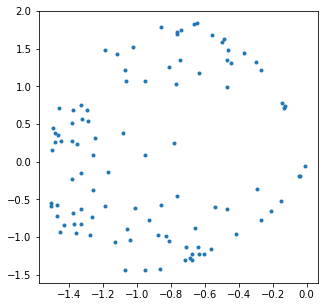

In [10]:
# method:  kernel pca

from scipy import stats
from sklearn import datasets
from sklearn import decomposition

size = 10
mean = 20. * np.random.random_sample(size) - 10.
variances = np.array([10., 2., 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
transform = stats.ortho_group.rvs(dim=size)
covariance = transform @ np.diag(variances) @ transform.T

count = 100
XT = np.random.multivariate_normal(mean, covariance, count)
XT -= XT.mean(0)

#K = XT @ XT.T
#V, S2, _ = np.linalg.svd(K)

K = np.empty((count, count))
for row in range(count):
    for col in range(count):
        K[row, col] = np.exp(-0.1 * ((XT[row] - XT[col])**2).sum())
V, S2, _ = np.linalg.svd(K)

C = np.identity(count) - np.ones((count,count)) / count
K = C @ K @ C

print("cumulated fractions of variance in original data:")
fractions = S2.cumsum() / S2.sum() #niezerowych wartości osobliwych
#print(fractions)

print("fraction and retained axes")
fraction = 0.9
axes = 1 + fractions.searchsorted(fraction) # dont know why it doesn't work with this
axes = 4
print(fraction,axes)

plt.figure(figsize=(5,5))
#plt.xlim(-10.,10.)
#plt.ylim(-10.,10.)

YRT = V[:, :axes] * np.sqrt(S2[:axes])
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.figure(figsize=(5,5))
#plt.xlim(-10.,10.)
#plt.ylim(-10.,10.)

pca = decomposition.PCA(fraction)
pca.fit(XT)
YRT = pca.transform(XT)
plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.figure(figsize=(5,5))
#plt.xlim(-10.,10.)
#plt.ylim(-10.,10.)

ZT = np.sqrt(count) * V
ZRT = ZT[:, :axes]
plt.plot(ZRT[:,0], ZRT[:,1], ".")

plt.show()

target:
 [1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0]
cumulated fractions of variance in original data:
fraction and retained axes
0.5 2


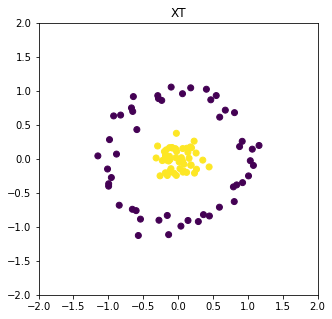

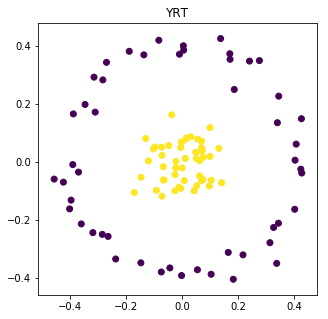

<Figure size 360x360 with 0 Axes>

In [31]:
# method:  kernel pca

from scipy import stats
from sklearn import datasets
from sklearn import decomposition


plt.figure(figsize=(5,5))
plt.xlim(-2., 2.)
plt.ylim(-2., 2.)

count = 100
XT, target = datasets.make_circles(count, noise=0.1, factor = 0.2)
#XT, target = datasets.make_moons(count)

print("target:\n", target)

XT -= XT.mean(0)
plt.title("XT")
plt.scatter(XT[:, 0], XT[:, 1], marker="o", c=target)

K = np.empty((count, count))
for row in range(count):
    for col in range(count):
        K[row, col] = np.exp(-0.1 * ((XT[row] - XT[col])**2).sum()) #gamma = 0.1

C = np.identity(count) - np.ones((count,count)) / count
K = C @ K @ C
V, S2, _ = np.linalg.svd(K)

print("cumulated fractions of variance in original data:")
fractions = S2.cumsum() / S2.sum() #niezerowych wartości osobliwych
#print(fractions)

print("fraction and retained axes")
fraction = 0.5
axes = 1 + fractions.searchsorted(fraction)
#axes = 4
print(fraction,axes)

plt.figure(figsize=(5,5))
#plt.xlim(-1.,1.)
#plt.ylim(-1.,1.)

YRT = V[:, :axes] * np.sqrt(S2[:axes])
plt.title("YRT")
plt.scatter(YRT[:, 0], YRT[:, 1], marker="o", c = target)

plt.figure(figsize=(5,5))
#plt.xlim(-10.,10.)
#plt.ylim(-10.,10.)

#pca = decomposition.PCA(fraction)
#pca.fit(XT)
#YRT = pca.transform(XT)
#plt.plot(YRT[:, 0], YRT[:, 1], ".")


plt.show()

target:
 [1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1]
cumulated fractions of variance in original data:
fraction and retained axes
0.5 11


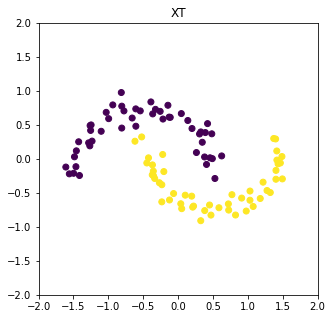

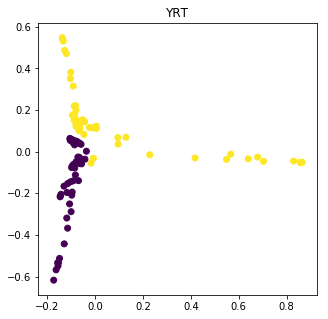

<Figure size 360x360 with 0 Axes>

In [40]:
# method:  kernel pca

from scipy import stats
from sklearn import datasets
from sklearn import decomposition


plt.figure(figsize=(5,5))
plt.xlim(-2., 2.)
plt.ylim(-2., 2.)

count = 100
#XT, target = datasets.make_circles(count, noise=0.1, factor = 0.2)
XT, target = datasets.make_moons(count, noise=0.1)

print("target:\n", target)

XT -= XT.mean(0)
plt.title("XT")
plt.scatter(XT[:, 0], XT[:, 1], marker="o", c=target)

K = np.empty((count, count))
for row in range(count):
    for col in range(count):
        K[row, col] = np.exp(-20. * ((XT[row] - XT[col])**2).sum()) #gamma = 0.1

C = np.identity(count) - np.ones((count,count)) / count
K = C @ K @ C
V, S2, _ = np.linalg.svd(K)

print("cumulated fractions of variance in original data:")
fractions = S2.cumsum() / S2.sum() #niezerowych wartości osobliwych
#print(fractions)

print("fraction and retained axes")
fraction = 0.5
axes = 1 + fractions.searchsorted(fraction)
print(fraction,axes)

plt.figure(figsize=(5,5))
#plt.xlim(-1.,1.)
#plt.ylim(-1.,1.)

YRT = V[:, :axes] * np.sqrt(S2[:axes])
plt.title("YRT")
plt.scatter(YRT[:, 0], YRT[:, 1], marker="o", c = target)

plt.figure(figsize=(5,5))
#plt.xlim(-10.,10.)
#plt.ylim(-10.,10.)

#pca = decomposition.PCA(fraction)
#pca.fit(XT)
#YRT = pca.transform(XT)
#plt.plot(YRT[:, 0], YRT[:, 1], ".")

plt.show()

(101, 1)


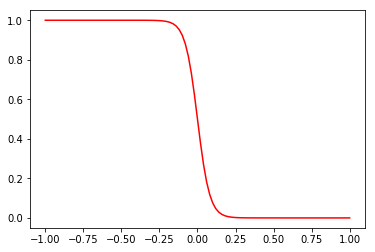

In [44]:
# liniowy klasyfikator

params = 25.
abscissa = np.linspace(-1., 1., 101)[:, np.newaxis]
print(abscissa.shape)
probs = 1. / (1. + np.exp(abscissa * params))
plt.plot(abscissa, probs, 'r')

(101, 1)


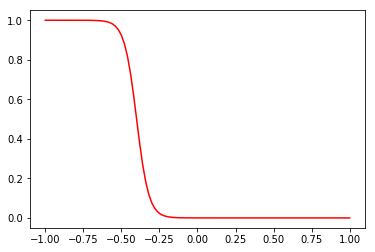

In [45]:
params = np.array([10., 25.])
abscissa = np.linspace(-1., 1., 101)[:, np.newaxis]
print(abscissa.shape)
probs = 1. / (1. + np.exp(params[0] + abscissa * params[1]))
plt.plot(abscissa, probs, 'r')

shape (101, 1)


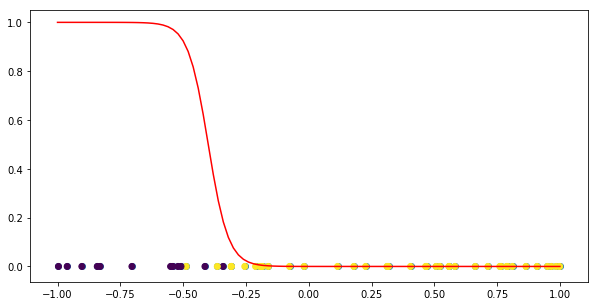

In [62]:
def getProbs(params, data):
    return (1. / (1. + np.exp(np.insert(data, 0, 1., 1) @ params)))


params = np.array([10., 25.])

abscissa = np.linspace(-1., 1., 101)[:, np.newaxis] # h(x) - rozkład Bernoulliego
probs = getProbs(params, abscissa)
print("shape", abscissa.shape)

plt.figure(figsize=(10, 5))
plt.plot(abscissa, probs, 'r')

data = 2. * np.random.random_sample((50, 1)) - 1.
plt.scatter(data, np.zeros(data.shape[0]), marker='o')

probs = getProbs(params, data)
target = np.random.binomial(1., 1. - probs)
plt.scatter(data, np.zeros(data.shape[0]), marker='o', c = target)



plt.show()

In [ ]:
# dopasowanie \vec{alfa} = (alfa_o, alfa_1) ==> uczenie klasyfikatora (!)